#  实验结果记录

In [3]:
# 记录使用input anderson normalize(0, 1)后的结果
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch
import pandas as pd

# h5py
```
{
"model_000":{
    'train_loss_per_batch':[],
    'train_loss_per_epoch': [],
    'validate_loss_per_batch': [],  #可选
    'validate_loss_per_epoch':[],    #可选
    'test_loss_per_epoch':[],
    'test_loss_per_batch':[]
        
    }
"model_001":{}
}
```

In [4]:
def plot_loss_epoch(file, title, n_model='model_000', train_only=False, begin=0):
        with h5py.File(file, 'r') as loss_f:
            train_grp = loss_f[n_model]
            train_loss = train_grp['train_loss_per_epoch'][:]
            validate_loss = train_grp['validate_loss_per_epoch'][:]

            test_loss = train_grp['test_loss_per_epoch'][:]
            # plot mse rather rmse , make confuse
            train_loss = np.array(train_loss)
            validate_loss = np.array(validate_loss)
            test_loss = np.array(test_loss)
            # plt.figure(figsize=(15, 5))
            plt.plot(np.arange(len(train_loss) - begin)+1 + begin, train_loss[begin:], '-o', label='train')
            if train_only is False:
                plt.plot(np.arange(len(validate_loss) - begin)+1 + begin, validate_loss[begin:], '-o', label='validate')
            plt.plot(len(train_loss), test_loss[0], '-o', label='test')
            
            plt.grid()
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.yscale('log')
            plt.title(label=title)
            plt.legend()
            print(f'train_loss mse: {train_loss}')
            print(f'validate_loss mse: {validate_loss}')
            print(f'test_loss mse: {test_loss}')
            

In [3]:
def compare_loss(file_1, file_2, n_model='model_000', title='none'):
    fig, axes = plt.subplots(1,2, figsize=(12, 5))
    fig.text(0.5, 0, 'Epoch')
    fig.text(0, 0.5, 'MSE', rotation='vertical')
    h5_1 = h5py.File(file_1, 'r')
    train_grp_1 = h5_1[n_model]
    train_loss_1 = train_grp_1['train_loss_per_epoch'][:]
    validate_loss_1 = train_grp_1['validate_loss_per_epoch'][:]
    test_loss_1 = train_grp_1['test_loss_per_epoch'][:]
    print(f'file_1 train loss, mse: {train_loss_1[-5:]}')
    print(f'file_1 test loss, mse: {test_loss_1}')

    h5_2 = h5py.File(file_2, 'r')
    train_grp_2 = h5_2[n_model]
    train_loss_2 = train_grp_2['train_loss_per_epoch'][:]
    validate_loss_2 = train_grp_2['validate_loss_per_epoch'][:]
    print(f'validate {validate_loss_2}')
    test_loss_2 = train_grp_2['test_loss_per_epoch'][:]
    print(f'file_2 train loss, mse: {train_loss_2[-5:]}')
    print(f'file_2 test loss, mse: {test_loss_2}')
    print()
    
    axes[0].plot(train_loss_1, '-o', label=f'{file_1}')
    axes[0].plot(train_loss_2, '-o', label=f'{file_2}')
    axes[0].set_title('train')
    axes[0].legend()
    axes[0].grid()
    axes[0].set_yscale('log')
    
    axes[1].plot(validate_loss_1, '-o', label=f'{file_1}')
    axes[1].plot(validate_loss_2, '-o', label=f'{file_2}')
    axes[1].set_title('validate')
    axes[1].legend()
    axes[1].grid()
    axes[1].set_yscale('log')
    plt.show()


## layer 7

## test1
使用 chebyshev_median.h5中的中位数，4000的训练集，查看模型的loss。

In [4]:
training_file = "datasets/chebyshev_0_4000.h5"
testing_file = "datasets/chebyshev_testing_1000.h5",
# train data


train_loss mse: [5.08408592e+00 2.66730606e-01 1.66443291e-01 8.03078543e-02
 3.70912541e-02 2.66282054e-02 2.04383588e-02 8.20012155e-03
 6.75304993e-03 5.25338993e-03 1.53074046e-03 1.14429557e-03
 1.40386895e-03 7.92027568e-04 7.24743504e-04 7.16691576e-04
 4.97783878e-04 5.02072025e-04 4.34109838e-04 3.68563435e-04]
validate_loss mse: [3.65261965e-01 1.19091744e-01 6.92017426e-02 4.62528423e-02
 4.92919880e-02 1.56615986e-02 5.48820771e-03 1.28129716e-02
 3.19876808e-03 2.23378245e-03 9.55637439e-04 1.58521568e-03
 1.06207589e-03 6.53060121e-04 7.85526903e-04 5.49018108e-04
 5.08675867e-04 4.98438953e-04 3.79041263e-04 3.64482359e-04]
test_loss mse: [0.00039702]


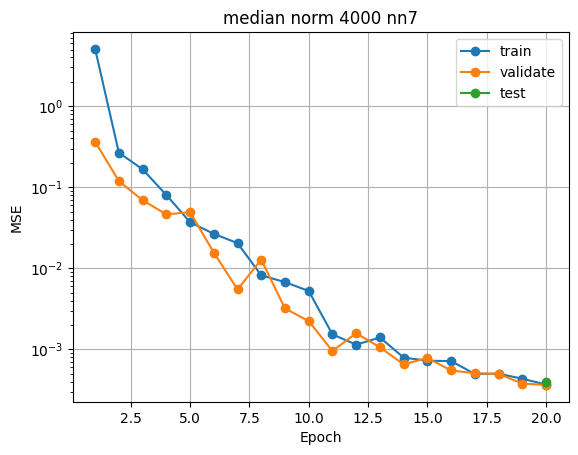

In [5]:
# plot epoch loss
plot_loss_epoch(file='nn_7/loss_1.h5', title="median norm 4000 nn7", begin=0)

In [7]:
file = 'nn_7/loss_1.h5'
h5 = h5py.File(file, 'r')
h5['model_000']['train_loss_per_batch'][-8:],h5['model_000']['validate_loss_per_batch'][-2:]

(array([0.00047923, 0.00045775, 0.00038872, 0.00041075, 0.00035946,
        0.00037398, 0.00036788, 0.00037293]),
 array([0.00037904, 0.00036448]))

# layer 14

## test2
与test1 相比，使用MyMLP_14，查看模型的loss。

In [8]:
file = 'nn_14/loss_2.h5'
h5 = h5py.File(file, 'r')
h5['model_000']['train_loss_per_batch'][-8:],h5['model_000']['validate_loss_per_batch'][-2:]

(array([8.56279566e-05, 7.98107097e-05, 8.61176768e-05, 8.15223096e-05,
        5.92012271e-05, 5.56063099e-05, 4.41345815e-05, 4.80916851e-05]),
 array([6.20091832e-05, 5.39181759e-05]))

train_loss mse: [6.71578120e-01 1.98371262e+00 4.92087553e-01 4.47032618e-01
 3.25647667e-01 1.91559125e-01 6.57988686e-02 1.24151834e-02
 6.12574654e-03 2.13067454e-03 7.69239597e-04 5.71349577e-04
 1.16890218e-04 3.35904548e-04 1.00123970e-04 1.23063339e-04
 1.14462284e-04 5.59286663e-05 8.32696632e-05 5.17584509e-05]
validate_loss mse: [1.50413148e-01 4.59145944e-01 4.85009295e-01 3.74149378e-01
 2.41859117e-01 1.09609658e-01 5.23165026e-03 1.62339931e-02
 2.75309960e-03 3.94708938e-04 9.32290381e-04 7.76139693e-05
 3.26387439e-04 1.89833825e-04 7.34357973e-05 1.60718769e-04
 5.11877333e-05 8.40251951e-05 6.20091832e-05 5.39181759e-05]
test_loss mse: [5.29240019e-05]


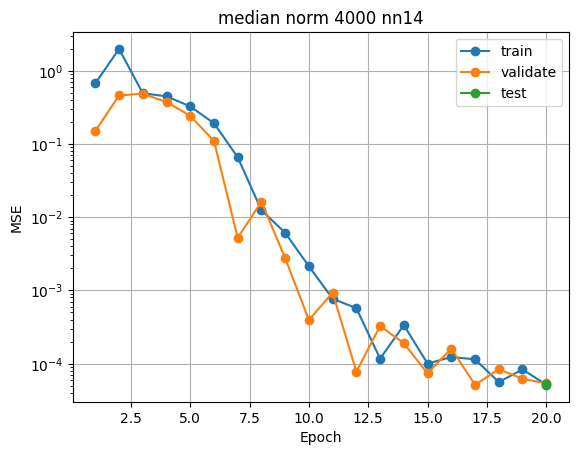

In [9]:
plot_loss_epoch(file='nn_14/loss_2.h5', title="median norm 4000 nn14", begin=0)
plt.yscale('log')

从上面看， 配置不变，网络加深，loss是变小了。,说明7层，模型过于简单

epoch 1 in training:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 9/10 [00:00<00:00, 13.36it/s]
                                                                                                                                                                                                                                                 train-mlp - INFO - Epoch : 1/20  train loss: 0.6275382767

  0%|                                                                                                                                                                                                                     | 0/1 [00:00<?, ?it/s]
                                                                                                                                                                                                                          

train_loss mse: [6.27538277e-01 5.12334459e-02 1.25685229e-02 5.34945482e-03
 1.82504203e-03 8.73599123e-04 5.58533126e-04 3.86052674e-04
 2.80290664e-04 2.27514887e-04 1.99511670e-04 1.89809618e-04
 1.80482746e-04 1.72110146e-04 1.63901520e-04 1.55747105e-04
 1.48311597e-04 1.41613353e-04 1.34810773e-04 1.29125904e-04]
validate_loss mse: [0.0890895  0.01215144 0.00907815 0.00317628 0.00088879 0.00067911
 0.00050655 0.00034147 0.0002595  0.00021426 0.00019983 0.00018929
 0.00018006 0.00017091 0.00016214 0.00015399 0.00014638 0.00013927
 0.0001326  0.00012634]
test_loss mse: [0.00013843]


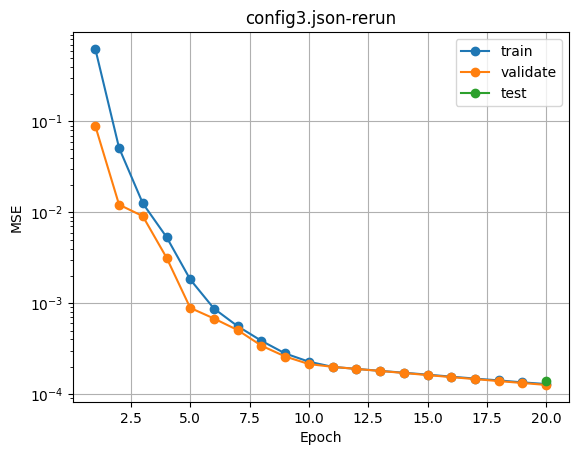

In [7]:
from run_mlp import main
from nn_models import MyMLP_7 as MyMLP   
main('config_3.json', network=MyMLP, loss_file='nn_7loss_config_3.h5')
plot_loss_epoch('loss_test3-n7.h5', title='config3.json-nn7')

## test3
与test2相比，训练集变为10000，查看模型的loss。
- Increase the size of your training dataset

在比较数据集大小时，其他保持不变，训练数据从4000->10000, loss变小一些。

In [2]:
from run_mlp import main
from nn_models import MyMLP_14 as MyMLP   
main('config_3.json', network=MyMLP, loss_file='loss_test3.h5')

epoch 1 in training:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 9/10 [00:00<00:00, 11.46it/s]
                                                                                                                                                                                                                                                 train-mlp - INFO - Epoch : 1/20  train loss: 0.6172460341

  0%|                                                                                                                                                                                                                     | 0/1 [00:00<?, ?it/s]
                                                                                                                                                                                                                          

train_loss mse: [6.17246034e-01 3.92534350e-02 1.94716195e-03 6.26924024e-04
 2.44399055e-04 1.01211188e-04 6.46370417e-05 5.24789635e-05
 4.79811810e-05 4.64184504e-05 4.59644335e-05 4.56870158e-05
 4.56444287e-05 4.55903262e-05 4.56043475e-05 4.55746831e-05
 4.56215779e-05 4.54835895e-05 4.56218576e-05 4.55808683e-05]
validate_loss mse: [1.33482723e-01 3.49291520e-03 1.13694902e-03 4.65865503e-04
 1.04215676e-04 5.81709012e-05 4.84837638e-05 4.69963736e-05
 4.72629149e-05 4.76919216e-05 4.70133856e-05 4.70694485e-05
 4.70255591e-05 4.69786357e-05 4.69756825e-05 4.70022124e-05
 4.69799893e-05 4.69756610e-05 4.69777193e-05 4.69930248e-05]
test_loss mse: [4.61090288e-05]


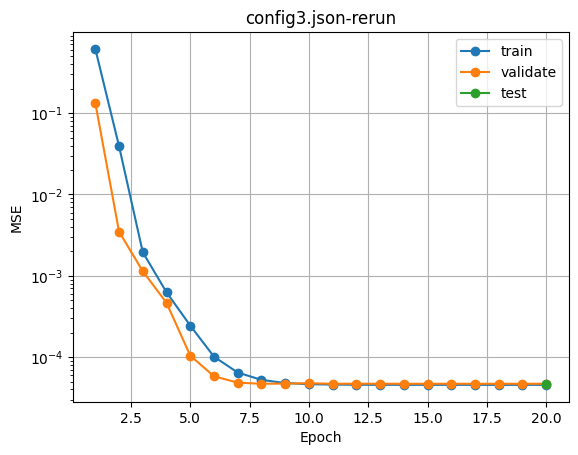

In [6]:
plot_loss_epoch('loss_test3.h5', title='config3.json-rerun')

In [10]:
# we use L6N255_10000.h5 to train nn-7
training_file = "datasets/chebyshev_10000.h5"
testing_file = "datasets/chebyshev_testing_1000.h5"
config = 'config_3.json'


train_loss mse: [6.15495549e-01 3.84705791e-02 1.38473125e-03 1.05449359e-04
 5.20143207e-05 4.87622019e-05 4.60755257e-05 4.59928697e-05
 4.56502109e-05 4.56651208e-05 4.55351819e-05 4.56072945e-05
 4.55899106e-05 4.55514000e-05 4.55680303e-05 4.55804948e-05
 4.56127593e-05 4.54735048e-05 4.56148473e-05 4.55725266e-05]
validate_loss mse: [1.29386627e-01 2.38251398e-03 1.11538249e-04 4.69934544e-05
 5.09088340e-05 4.74957343e-05 4.73990533e-05 4.71683589e-05
 4.69796774e-05 4.69969534e-05 4.69821017e-05 4.69865710e-05
 4.69757977e-05 4.70055702e-05 4.69761782e-05 4.69780298e-05
 4.69753513e-05 4.69802999e-05 4.69772557e-05 4.69754589e-05]
test_loss mse: [4.60964136e-05]


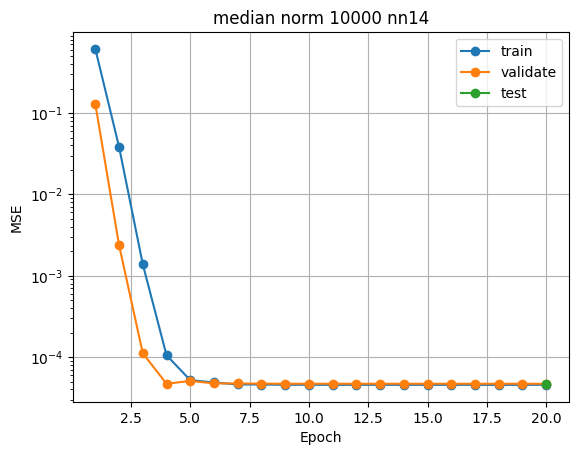

In [12]:
loss_f = 'nn_14/loss_3.h5'
plot_loss_epoch(loss_f, title="median norm 10000 nn14")
# 看着效果没有改善
del loss_f

file_1 train loss, mse: [1.23063339e-04 1.14462284e-04 5.59286663e-05 8.32696632e-05
 5.17584509e-05]
file_1 test loss, mse: [5.29240019e-05]
validate [1.29386627e-01 2.38251398e-03 1.11538249e-04 4.69934544e-05
 5.09088340e-05 4.74957343e-05 4.73990533e-05 4.71683589e-05
 4.69796774e-05 4.69969534e-05 4.69821017e-05 4.69865710e-05
 4.69757977e-05 4.70055702e-05 4.69761782e-05 4.69780298e-05
 4.69753513e-05 4.69802999e-05 4.69772557e-05 4.69754589e-05]
file_2 train loss, mse: [4.55804948e-05 4.56127593e-05 4.54735048e-05 4.56148473e-05
 4.55725266e-05]
file_2 test loss, mse: [4.60964136e-05]



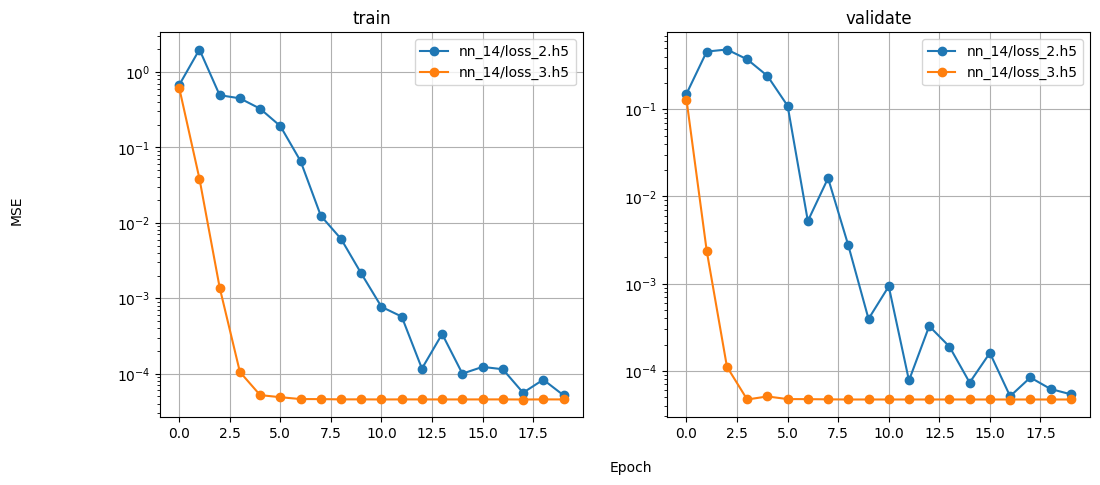

In [14]:
file_1 = 'nn_14/loss_2.h5'
file_2 = 'nn_14/loss_3.h5'
compare_loss(file_1, file_2)
del file_1, file_2
# 图 左边为 train size:4000, 右边为train size:10000

## test4
增加batch_size:1024----> 2048
差别不大，但是batch_size选择不一样，会导致loss 抖动

file_1 train loss, mse: [4.55804948e-05 4.56127593e-05 4.54735048e-05 4.56148473e-05
 4.55725266e-05]
file_1 test loss, mse: [4.60964136e-05]
validate [2.69441077e-01 4.93753481e-01 2.60745276e-01 2.30398356e-02
 1.06310130e-04 1.35199669e-02 6.61591609e-05 1.90116891e-03
 1.62659281e-04 4.72254896e-05 5.11725747e-05 5.68070116e-05
 5.60141740e-05 5.15432706e-05 4.83041399e-05 4.70310149e-05
 4.71282510e-05 4.74345501e-05 4.74380159e-05 4.72213309e-05]
file_2 train loss, mse: [4.63410594e-05 4.55904164e-05 4.57563300e-05 4.60018033e-05
 4.59384144e-05]
file_2 test loss, mse: [4.63651236e-05]



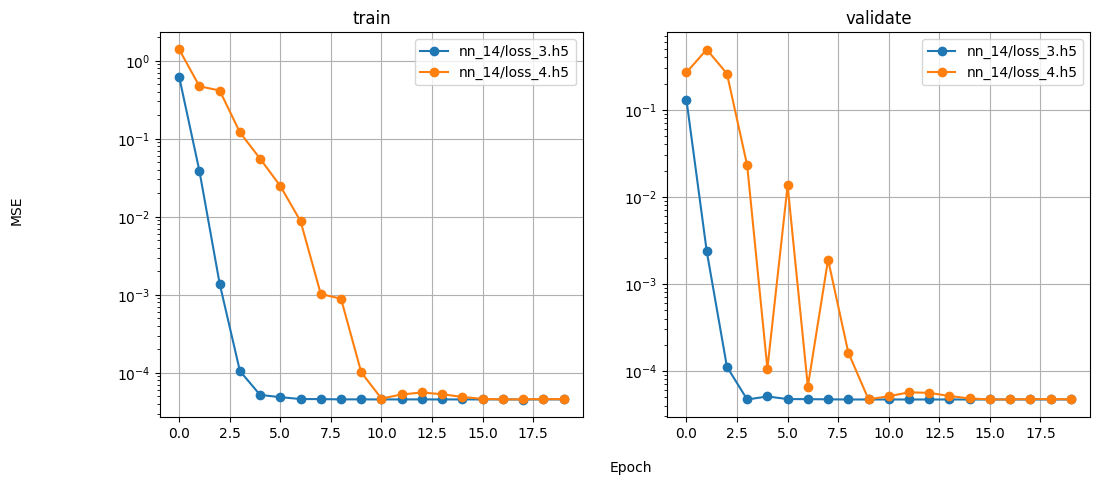

In [16]:
file_1 = 'nn_14/loss_3.h5'   # 1024
file_2 = 'nn_14/loss_4.h5'   # 2048
compare_loss(file_1, file_2, title='batchsize 1024 ---> 2048')


## test5
与test4相比，数据集改成将anderson模型规范化，规范化为8个维度，每个维度的均值方差记在10000_norm_meta.h5，Chebyshev系数与test4一样，也是使用median规范化的。
- Normalize your input data
Scaling the input features to a similar range can prevent certain features from dominating the learning process and help the MLP model converge faster.

file_1 train loss, mse: [4.63410594e-05 4.55904164e-05 4.57563300e-05 4.60018033e-05
 4.59384144e-05]
file_1 test loss, mse: [4.63651236e-05]
validate [2.48480327e-01 1.84209072e-02 2.69031422e-02 6.89009192e-03
 7.40018500e-03 2.17317019e-03 3.29269158e-03 3.47550453e-04
 1.30573165e-03 1.73016692e-04 2.98606399e-04 1.32339526e-04
 4.72891527e-05 8.56593397e-05 7.72938009e-05 4.88450996e-05
 5.11186779e-05 5.36741245e-05 4.79535071e-05 4.75812027e-05]
file_2 train loss, mse: [6.21191883e-05 4.66917663e-05 5.21035001e-05 5.01840097e-05
 4.59455662e-05]
file_2 test loss, mse: [4.66687902e-05]



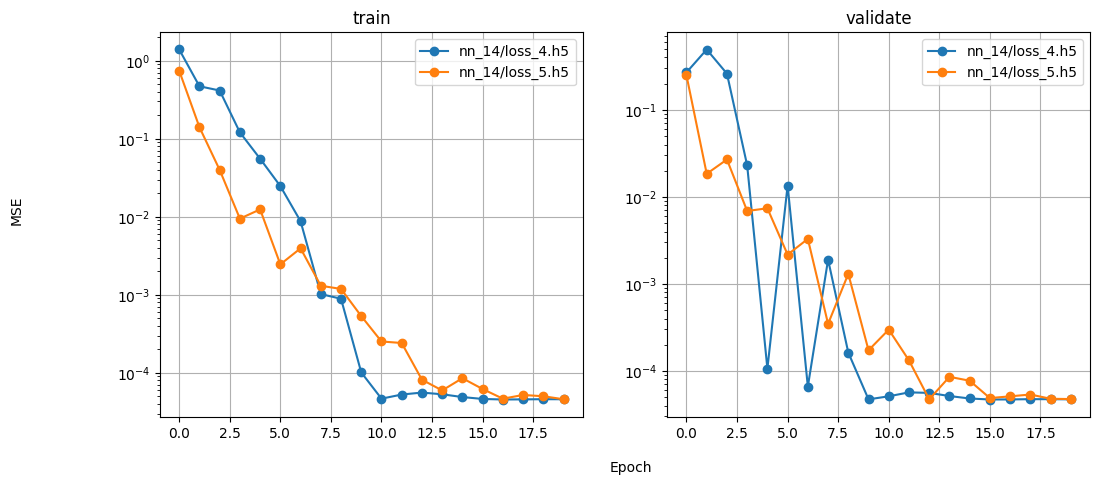

In [17]:
del file_1, file_2
file_1 = 'nn_14/loss_4.h5'   # test4
file_2 = "nn_14/loss_5.h5"   # test5
compare_loss(file_1, file_2)

# test6
与 test5相比，epoch 20--->30
从图片分析，在训练初期，train_loss大于validate loss， 在epoch > 20以后，train_loss小于于validate loss。

train_loss mse: [7.42402427e-01 1.40348346e-01 3.98330562e-02 9.45569814e-03
 1.24272433e-02 2.45607402e-03 3.94166904e-03 1.30630994e-03
 1.18960941e-03 5.33778887e-04 2.52485416e-04 2.41357355e-04
 8.17618347e-05 5.95577119e-05 8.54304431e-05 6.21191883e-05
 4.66917663e-05 5.21035001e-05 5.01840097e-05 4.59455662e-05
 4.62709322e-05 4.63749951e-05 4.61123994e-05 4.58238359e-05
 4.56172322e-05 4.55889516e-05 4.56052154e-05 4.56451283e-05
 4.56320510e-05 4.55967109e-05]
validate_loss mse: [2.48480327e-01 1.84209072e-02 2.69031422e-02 6.89009192e-03
 7.40018500e-03 2.17317019e-03 3.29269158e-03 3.47550453e-04
 1.30573165e-03 1.73016692e-04 2.98606399e-04 1.32339526e-04
 4.72891527e-05 8.56593397e-05 7.72938009e-05 4.88450996e-05
 5.11186779e-05 5.36741245e-05 4.79535071e-05 4.75812027e-05
 4.78940556e-05 4.76991543e-05 4.73001776e-05 4.70431585e-05
 4.69760528e-05 4.69846631e-05 4.69924945e-05 4.69850424e-05
 4.69760477e-05 4.69766072e-05]
test_loss mse: [4.60967302e-05]


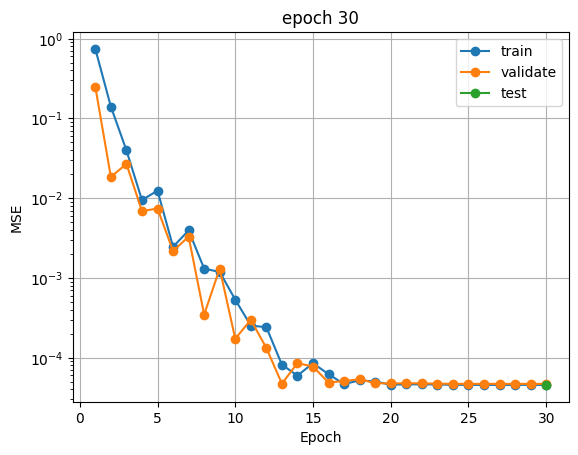

In [22]:
epoch30_loss = 'nn_14/loss_6.h5'
plot_loss_epoch(epoch30_loss, title='epoch 30', begin=0)

## **Adjust the architecture of your MLP**: 
Experiment with different numbers of hidden layers, neurons per layer, and activation functions to find the optimal configuration for your specific problem.
> resnet